### Amit Anand 
### 4th Sem
### DSE B

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression

In [2]:
df_incl_textual=pd.read_csv("mtcars.csv")

In [3]:
df=df_incl_textual.select_dtypes(include='number')

<Axes: >

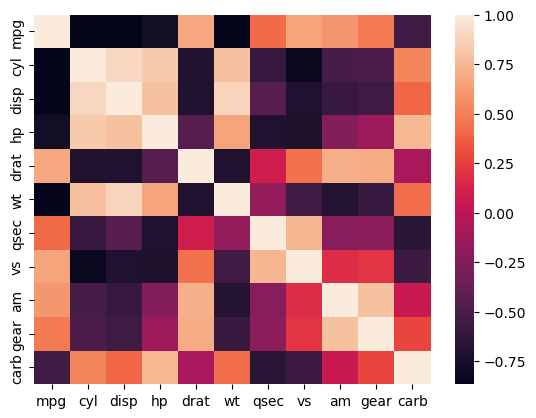

In [4]:
sns.heatmap(df.corr())

In [5]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Regression between wt and disp

In [6]:
x = np.array(df['wt']).reshape(-1, 1)
y = np.array(df['disp']).reshape(-1, 1)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
x_train,y_train

(array([[3.845],
        [3.46 ],
        [2.2  ],
        [3.15 ],
        [3.57 ],
        [1.935],
        [3.84 ],
        [2.875],
        [2.78 ],
        [3.57 ],
        [3.44 ],
        [1.615],
        [2.77 ],
        [1.835],
        [3.44 ],
        [3.19 ],
        [1.513],
        [3.215],
        [2.62 ],
        [3.52 ],
        [5.424],
        [3.73 ]]),
 array([[400. ],
        [225. ],
        [ 78.7],
        [140.8],
        [301. ],
        [ 79. ],
        [350. ],
        [160. ],
        [121. ],
        [360. ],
        [360. ],
        [ 75.7],
        [145. ],
        [ 71.1],
        [167.6],
        [146.7],
        [ 95.1],
        [258. ],
        [160. ],
        [318. ],
        [460. ],
        [275.8]]))

Text(0.5, 1.0, 'FOR TRAINING DATASET')

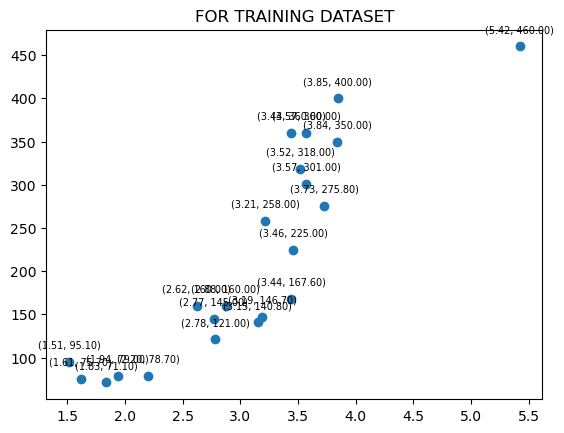

In [9]:
plt.scatter(x_train,y_train)
for i, (xi, yi) in enumerate(zip(x_train, y_train)):
    plt.annotate(f'({xi[0]:.2f}, {yi[0]:.2f})', (xi[0], yi[0]), textcoords="offset points", xytext=(0,10), ha='center',fontsize=7)
plt.title("FOR TRAINING DATASET")

In [10]:
regr=LinearRegression()

In [11]:
regr.fit(x_train,y_train)

LinearRegression()

In [12]:
c=regr.intercept_
m=regr.coef_

In [13]:
print(c)
print(m)

[-144.87650563]
[[117.50274848]]


In [14]:
y_pred=regr.predict(x_test)

In [15]:
y_pred

array([[333.35968067],
       [258.74543539],
       [259.33294913],
       [127.72987084],
       [483.17568497],
       [472.01292387],
       [227.60720704],
       [106.57937611],
       [144.76776937],
       [299.28388361]])

In [16]:
y_test

array([[275.8],
       [304. ],
       [167.6],
       [108. ],
       [440. ],
       [472. ],
       [351. ],
       [120.3],
       [120.1],
       [275.8]])

Text(0.5, 1.0, 'PREDICTION RESULTS')

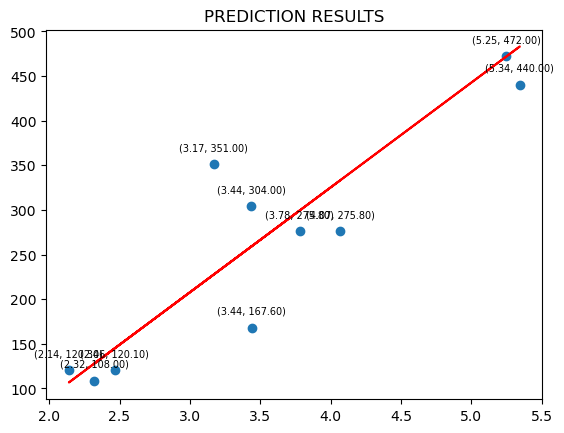

In [17]:
plt.scatter(x_test,y_test)
for i, (xi, yi) in enumerate(zip(x_test, y_test)):
    plt.annotate(f'({xi[0]:.2f}, {yi[0]:.2f})', (xi[0], yi[0]), textcoords="offset points", xytext=(0,10), ha='center',fontsize=7)

plt.plot(x_test,m*x_test+c, color ='r')
plt.title("PREDICTION RESULTS")

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Square Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Square Error (MSE): 3260.3462665210795
Mean Absolute Error (MAE): 44.27307439140652
Root Mean Square Error (RMSE): 57.09944191076721


# MultiLinear Regression

In [19]:
x=df[['mpg','wt']]
y=df['disp']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
regr2=LinearRegression()

In [22]:
regr2.fit(x_train,y_train)

LinearRegression()

In [23]:
regr2.coef_

array([-5.84699513, 80.5425967 ])

In [24]:
regr2.intercept_

92.7284577293538

In [25]:
y_pred = regr2.predict(x_test)

In [26]:
y_pred

array([324.64610622, 280.51795147, 265.71847713, 146.2757932 ,
       437.27780872, 454.76834107, 255.66596627, 113.0677414 ,
       165.55556339, 308.30514733])

In [27]:
y_test

11    275.8
22    304.0
10    167.6
2     108.0
16    440.0
14    472.0
28    351.0
26    120.3
20    120.1
13    275.8
Name: disp, dtype: float64

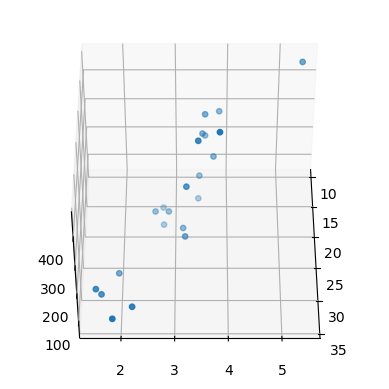

In [28]:
df_train=x_train
df_train['disp']=y_train
fig=plt.figure()
ax = plt.axes(projection="3d")
# ax = fig.add_subplot(projection ='3d')
ax.scatter(df_train['mpg'], df_train['wt'], df_train['disp'], s = 15)
ax.view_init(45, 0)

/Users/amitanand/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


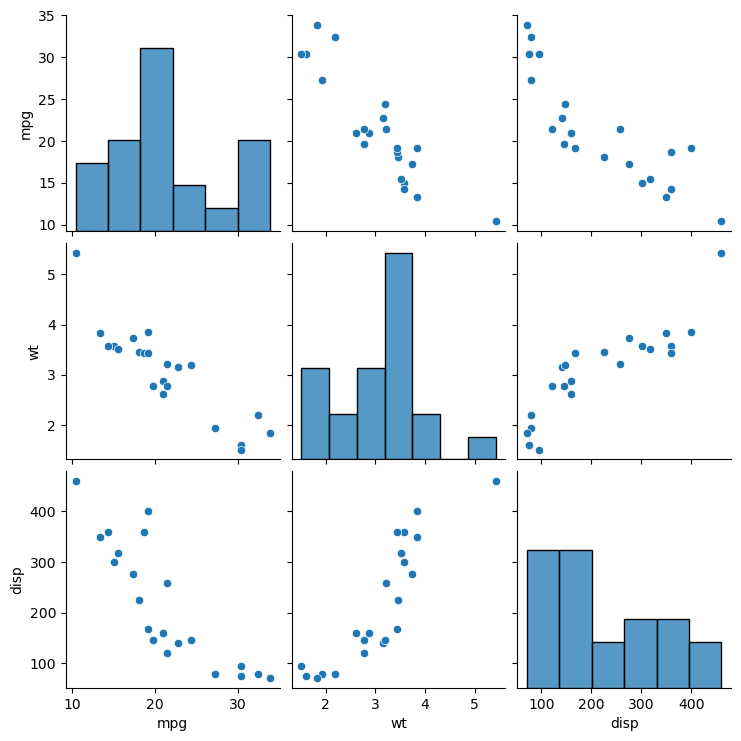

In [29]:
sns.pairplot(df_train[['mpg','wt','disp']])

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Square Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Square Error (MSE): 2659.7637387747377
Mean Absolute Error (MAE): 40.92032783368943
Root Mean Square Error (RMSE): 51.572897327712134
